In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset 
df = pd.read_csv("cleaned_data_13 columns.csv")

In [6]:
print(df.columns.tolist())

['member_number', 'SVC_REQ_DT', 'SVC_REQ_ID', 'SVC_RGN_CD', 'BRKDW_LATD_NUM', 'BRKDW_LNGTD_NUM', 'VEH_MDL_YR_DT', 'CALC_TW_ML_CNT', 'LST_STAT_RSN_TXT', 'REQ_SRC_TXT', 'TOT_COST', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME', 'SVC_REQ_DAY', 'SVC_REQ_MONTH', 'SVC_REQ_YEAR']


In [7]:
# Convert datetime column (SVC_REQ_DT) to numerical (days since first request)
df['SVC_REQ_DT'] = pd.to_datetime(df['SVC_REQ_DT'])
df['SVC_REQ_DT'] = (df['SVC_REQ_DT'] - df['SVC_REQ_DT'].min()).dt.days

In [8]:
# Exclude the target variable
target_variable = 'LST_STAT_RSN_TXT'  


In [9]:
# Selecting all numerical columns excluding the target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col != target_variable]

In [10]:
# Compute correlation matrix for all numerical columns
corr_matrix_all = df[numerical_cols].corr()

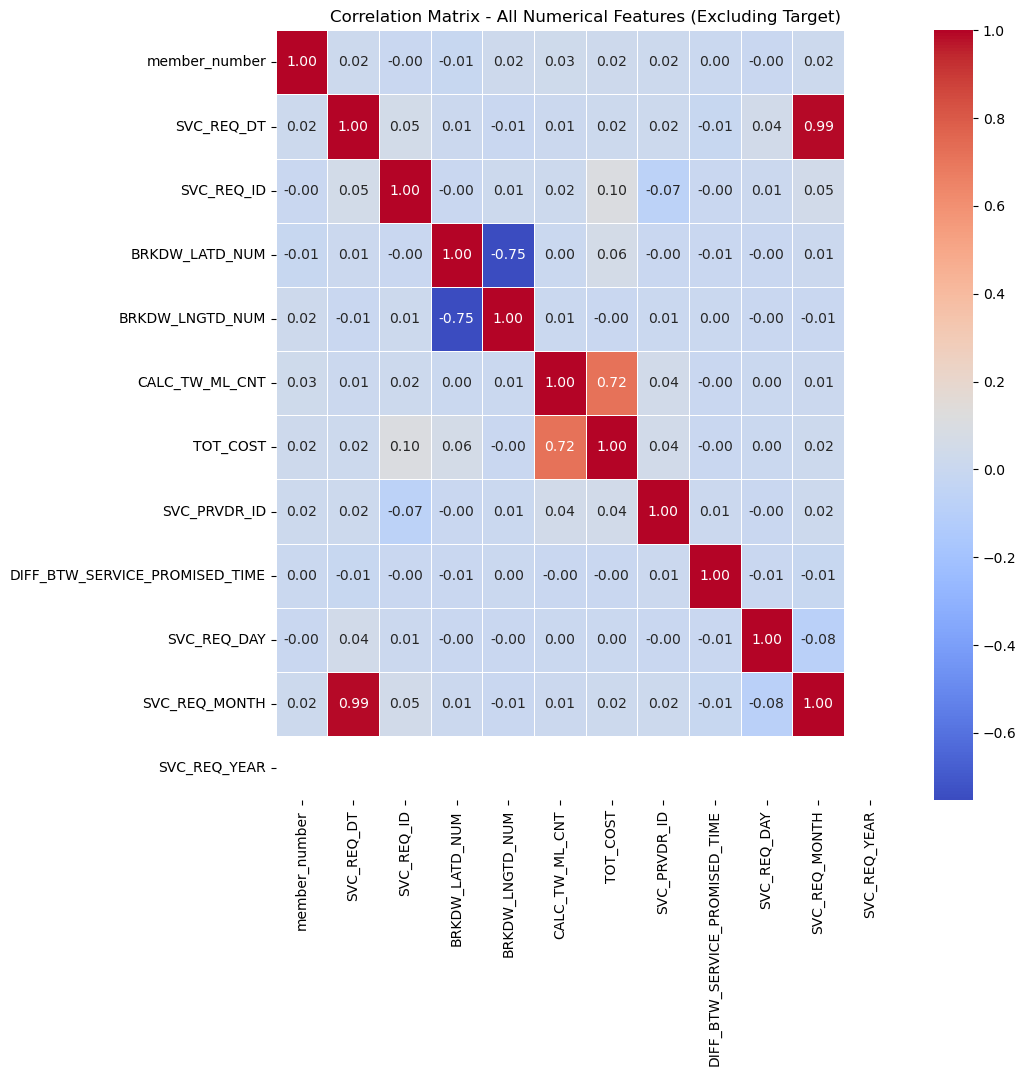

In [11]:
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - All Numerical Features (Excluding Target)")
plt.show()

In [12]:
# Step 1: Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values before dropping rows:")
print(missing_values)


Missing values before dropping rows:
member_number                     22126
SVC_REQ_DT                            0
SVC_REQ_ID                            0
SVC_RGN_CD                            0
BRKDW_LATD_NUM                      382
BRKDW_LNGTD_NUM                     382
VEH_MDL_YR_DT                       587
CALC_TW_ML_CNT                     1883
LST_STAT_RSN_TXT                   6388
REQ_SRC_TXT                           0
TOT_COST                           9283
SVC_PRVDR_ID                          0
DIFF_BTW_SERVICE_PROMISED_TIME     1099
SVC_REQ_DAY                           0
SVC_REQ_MONTH                         0
SVC_REQ_YEAR                          0
dtype: int64


In [13]:
# Step 2: Drop rows with missing values
df_cleaned = df.dropna(axis=0)

# Check the number of rows before and after dropping
rows_before = df.shape[0]
rows_after = df_cleaned.shape[0]
print(f"Rows before dropping: {rows_before}")
print(f"Rows after dropping: {rows_after}")


Rows before dropping: 179539
Rows after dropping: 147383


In [14]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Set a threshold for correlation (e.g., 0.7)
threshold = 0.7

# Find pairs of highly correlated features (correlation greater than the threshold)
high_corr_pairs = []
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, col]) > threshold and row != col:
            # Ensure the pair is only added once (avoid symmetric pairs)
            if (col, row) not in high_corr_pairs and (row, col) not in high_corr_pairs:
                high_corr_pairs.append((row, col))

# Display the high correlation pairs
print("Highly correlated feature pairs (correlation > 0.7):")
for pair in high_corr_pairs:
    print(pair)

# Drop one feature from each correlated pair, but retain 'TOT_COST' and both lat/long features
cols_to_drop = set()
for pair in high_corr_pairs:
    # Skip dropping latitude and longitude
    if set(pair) == {'BRKDW_LNGTD_NUM', 'BRKDW_LATD_NUM'}:
        continue  # Don't drop either of these features

    # Drop 'SVC_REQ_MONTH' if it's highly correlated with 'SVC_REQ_DT', but retain 'SVC_REQ_DT'
    if 'SVC_REQ_MONTH' in pair and 'SVC_REQ_DT' in pair:
        cols_to_drop.add('SVC_REQ_MONTH')
    
    # If 'TOT_COST' is in the pair, retain 'TOT_COST' and drop the other feature
    if 'TOT_COST' in pair:
        cols_to_drop.add(pair[0] if pair[1] == 'TOT_COST' else pair[1])
    else:
        # If 'TOT_COST' is not in the pair, drop either of the correlated features
        cols_to_drop.add(pair[1])  # Dropping the second feature in the pair

# Drop the identified columns
df_cleaned_reduced = df_cleaned.drop(columns=cols_to_drop)

# Display the updated columns after dropping
print("\nColumns after dropping highly correlated features and month/year columns:")
print(df_cleaned_reduced.columns.tolist())



Highly correlated feature pairs (correlation > 0.7):
('SVC_REQ_MONTH', 'SVC_REQ_DT')
('BRKDW_LNGTD_NUM', 'BRKDW_LATD_NUM')
('TOT_COST', 'CALC_TW_ML_CNT')

Columns after dropping highly correlated features and month/year columns:
['member_number', 'SVC_REQ_ID', 'SVC_RGN_CD', 'BRKDW_LATD_NUM', 'BRKDW_LNGTD_NUM', 'VEH_MDL_YR_DT', 'LST_STAT_RSN_TXT', 'REQ_SRC_TXT', 'TOT_COST', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME', 'SVC_REQ_DAY', 'SVC_REQ_YEAR']


/tmp/ipykernel_11051/276840886.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


In [15]:
# Print the columns in the DataFrame
print(df_cleaned_reduced.columns.tolist())


['member_number', 'SVC_REQ_ID', 'SVC_RGN_CD', 'BRKDW_LATD_NUM', 'BRKDW_LNGTD_NUM', 'VEH_MDL_YR_DT', 'LST_STAT_RSN_TXT', 'REQ_SRC_TXT', 'TOT_COST', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME', 'SVC_REQ_DAY', 'SVC_REQ_YEAR']


In [16]:
# Count occurrences of each service request source
request_source_counts = df['REQ_SRC_TXT'].value_counts()
print("Service Request Source Counts:")
print(request_source_counts)


Service Request Source Counts:
Emergency Road Service         169200
Roadside Assistance Program      9255
Service Ticket                    756
Reciprocal                        324
Reimbursement                       4
Name: REQ_SRC_TXT, dtype: int64


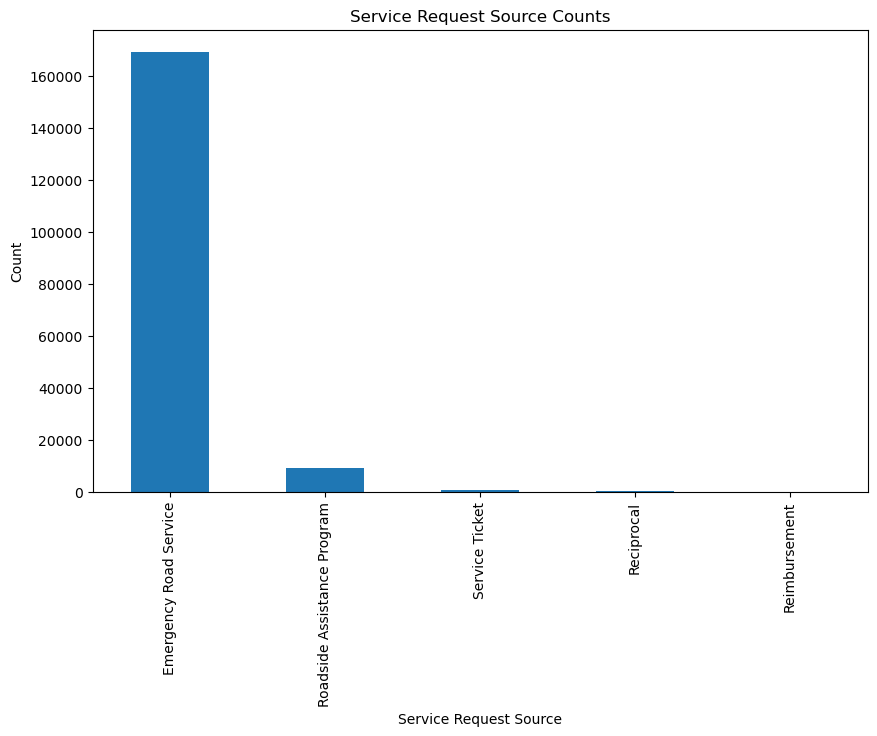

In [14]:
import matplotlib.pyplot as plt

# Count occurrences of each service request source
request_source_counts = df['REQ_SRC_TXT'].value_counts()

# Plotting the bar graph
request_source_counts.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Service Request Source Counts')
plt.xlabel('Service Request Source')
plt.ylabel('Count')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


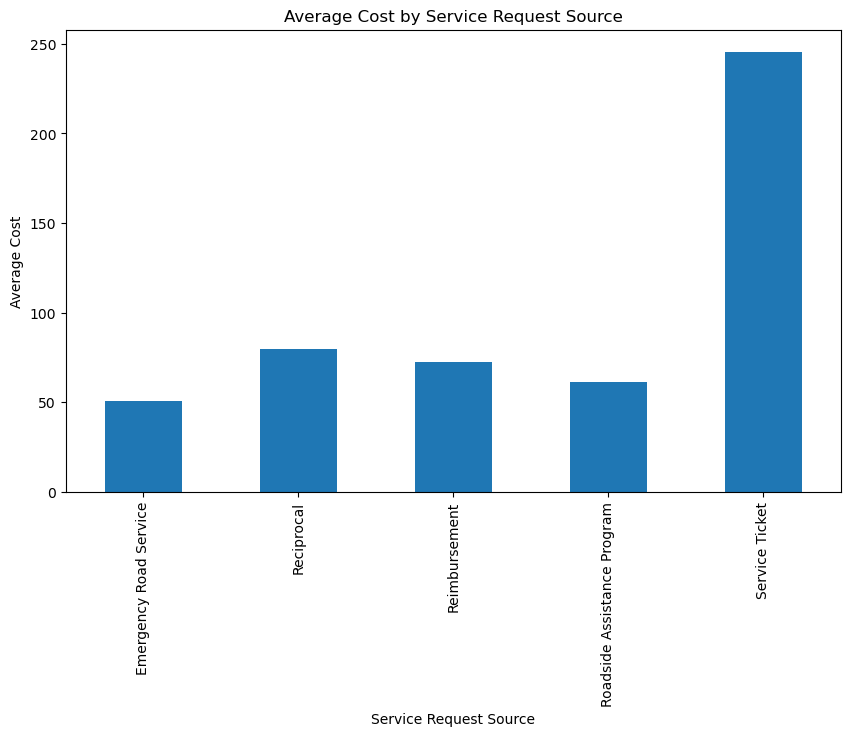

In [17]:
# Grouping by 'REQ_SRC_TXT' (Service Request Source) and calculating the average total cost
df.groupby('REQ_SRC_TXT')['TOT_COST'].mean().plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Average Cost by Service Request Source')
plt.xlabel('Service Request Source')
plt.ylabel('Average Cost')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


In [18]:
# Grouping by 'REQ_SRC_TXT' (Service Request Source) and calculating the average total cost
average_cost_by_source = df.groupby('REQ_SRC_TXT')['TOT_COST'].mean()

# Printing the average costs for each service request source as numbers
print("Average Cost by Service Request Source:")
print(average_cost_by_source)


Average Cost by Service Request Source:
REQ_SRC_TXT
Emergency Road Service          50.597542
Reciprocal                      79.837870
Reimbursement                   72.475000
Roadside Assistance Program     61.339815
Service Ticket                 245.600660
Name: TOT_COST, dtype: float64


In [19]:
# Group by the service request source and calculate the sum of the total cost for each source
cost_by_source_sum = df_cleaned_reduced.groupby('REQ_SRC_TXT')['TOT_COST'].sum()

# Sort by total cost in descending order to see which request source has the highest total cost
cost_by_source_sorted_sum = cost_by_source_sum.sort_values(ascending=False)

# Display the result
print("Total Cost by Service Request Source:")
print(cost_by_source_sorted_sum)




Total Cost by Service Request Source:
REQ_SRC_TXT
Emergency Road Service    7453209.72
Name: TOT_COST, dtype: float64


In [20]:
# Count the occurrence of each cancellation reason
cancellation_reasons = df_cleaned_reduced['LST_STAT_RSN_TXT'].value_counts()

# Display the most common cancellation reasons
print(cancellation_reasons)



SERVICE COMPLETED                 123704
CANCEL                             15570
Unsuccessful Service Attempt        2637
Member Appeasement                  2072
GONE ON ARRIVAL                     1892
Auto Close - DO NOT USE              655
MOTORCYCLE COVERAGE-SERVICED         544
Facility Accountable                 162
CASH CALL                             89
HISTORY TICKET - INTERNAL             28
NO PHOTO ID                           23
MOTORCYCLE COVERAGE-NO SERVICE         4
NEEDS AUDIT REVIEW                     3
Name: LST_STAT_RSN_TXT, dtype: int64


In [20]:
# Check for missing values in df_cleaned
missing_values = df_cleaned_reduced.isnull().sum()

# Display missing values for each column
print("Missing values in each column:")
print(missing_values)

# Check the total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")

Missing values in each column:
member_number                     0
SVC_REQ_ID                        0
SVC_RGN_CD                        0
BRKDW_LATD_NUM                    0
BRKDW_LNGTD_NUM                   0
VEH_MDL_YR_DT                     0
LST_STAT_RSN_TXT                  0
REQ_SRC_TXT                       0
TOT_COST                          0
SVC_PRVDR_ID                      0
DIFF_BTW_SERVICE_PROMISED_TIME    0
SVC_REQ_DAY                       0
SVC_REQ_YEAR                      0
dtype: int64

Total missing values: 0


In [21]:
!pip install imbalanced-learn


In [38]:
for col in categorical_columns:
    print(df_cleaned_reduced[col].value_counts())


Emergency Road Service    147383
Name: REQ_SRC_TXT, dtype: int64
FL    101231
GA     34483
TN      8338
MN      1356
PR       747
WI       589
MI       295
IL       189
IA       128
IN        19
ND         7
NE         1
Name: SVC_RGN_CD, dtype: int64
2007-01-01 00:00:00+00:00    9164
2006-01-01 00:00:00+00:00    9117
2005-01-01 00:00:00+00:00    8530
2008-01-01 00:00:00+00:00    8386
2004-01-01 00:00:00+00:00    7742
                             ... 
1942-01-01 00:00:00+00:00       1
1935-01-01 00:00:00+00:00       1
1933-01-01 00:00:00+00:00       1
1923-01-01 00:00:00+00:00       1
1946-01-01 00:00:00+00:00       1
Name: VEH_MDL_YR_DT, Length: 93, dtype: int64


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Step 1: Define the cancellation reasons and create the target column
successful_service = ['SERVICE COMPLETED', 'MOTORCYCLE COVERAGE-SERVICED', 'Auto Close - DO NOT USE','CASH CALL', 'HISTORY TICKET - INTERNAL', 'NO PHOTO ID', 'MOTORCYCLE COVERAGE-NO SERVICE']
explicitly_canceled = ['CANCEL']
at_risk_service = ['Unsuccessful Service Attempt', 'GONE ON ARRIVAL']
customer_internal_adjustments = ['Member Appeasement', 'Facility Accountable', 'NEEDS AUDIT REVIEW']

# Create the target column (4 categories) in df_cleaned_reduced
df_cleaned_reduced['target'] = df_cleaned_reduced['LST_STAT_RSN_TXT'].apply(
    lambda x: 0 if x in successful_service else 
              (1 if x in explicitly_canceled else 
               (2 if x in at_risk_service else 3))  # 2 for At Risk, 3 for Potential Impact
)

# Step 2: Define the columns to be used 
columns_to_use = ['REQ_SRC_TXT', 'TOT_COST', 'SVC_RGN_CD', 'DIFF_BTW_SERVICE_PROMISED_TIME', 'VEH_MDL_YR_DT', 'SVC_REQ_DAY']

# Step 3: Define the feature set X and target variable y
X = df_cleaned_reduced[columns_to_use]  # Use only the specified columns
y = df_cleaned_reduced['target']  # Use the target column

# Step 4: Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 5: Create a preprocessing pipeline for categorical data (OneHotEncoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns)  # Scaling numeric features
    ], 
    remainder='passthrough'  
)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Preprocess the data first
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Checking if the result is sparse, and convert it to dense if necessary
if isinstance(X_train_preprocessed, csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()
if isinstance(X_test_preprocessed, csr_matrix):
    X_test_preprocessed = X_test_preprocessed.toarray()

# Step 8: Apply SMOTE to balance the training data (after preprocessing)
smote = SMOTE(sampling_strategy={0: 99900, 1: 30000, 2: 15000, 3: 10000}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Step 9: Create a Logistic Regression model
classifier = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='ovr')

# Step 10: Train the model on the resampled and preprocessed data
classifier.fit(X_train_resampled, y_train_resampled)

# Step 11: Make predictions
y_pred = classifier.predict(X_test_preprocessed)

# Step 12: Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     25147
           1       0.85      1.00      0.92      3023
           2       0.03      0.13      0.05       859
           3       0.05      0.25      0.08       448

    accuracy                           0.75     29477
   macro avg       0.48      0.53      0.47     29477
weighted avg       0.92      0.75      0.82     29477



In [31]:
import numpy as np

print("Original class distribution:\n", np.bincount(y_train))
print("After SMOTE:\n", np.bincount(y_train_resampled))


Original class distribution:
 [99900 12547  3670  1789]
After SMOTE:
 [99900 30000 15000 10000]


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     25147
           1       0.85      1.00      0.92      3023
           2       0.03      0.13      0.05       859
           3       0.05      0.25      0.08       448

    accuracy                           0.75     29477
   macro avg       0.48      0.53      0.47     29477
weighted avg       0.92      0.75      0.82     29477



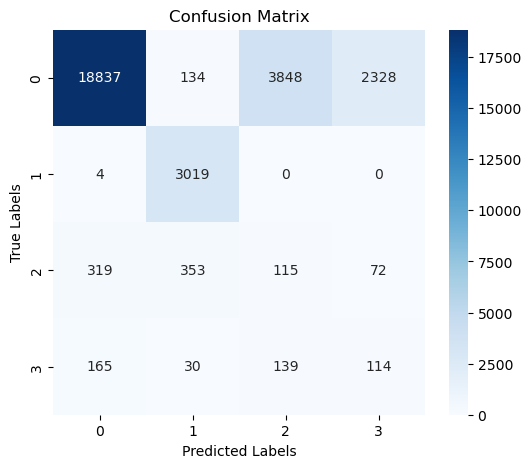


Model Coefficients:

                                               Class 0    Class 1   Class 2  \
cat__REQ_SRC_TXT_Emergency Road Service       0.674445  -7.138058 -0.674866   
cat__SVC_RGN_CD_FL                            0.027951  -1.170701  1.157197   
cat__SVC_RGN_CD_GA                           -0.297194  -1.141433  0.890140   
cat__SVC_RGN_CD_IA                           -1.292876  -0.411038  1.635956   
cat__SVC_RGN_CD_IL                            0.156564   0.025749 -2.478517   
...                                                ...        ...       ...   
cat__VEH_MDL_YR_DT_2019-01-01 00:00:00+00:00  0.260178  -0.210017  0.170474   
cat__VEH_MDL_YR_DT_2020-01-01 00:00:00+00:00  0.320674  -0.463310  0.145742   
num__TOT_COST                                 3.765403 -20.445634 -0.871817   
num__DIFF_BTW_SERVICE_PROMISED_TIME           0.004187  -0.050840 -0.009436   
num__SVC_REQ_DAY                              0.012101   0.031444 -0.024400   

                             

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 11: Make predictions
y_pred = classifier.predict(X_test_preprocessed)

# Step 12: Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 13: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Step 14: Extract Model Parameters (Coefficients)
feature_names = preprocessor.get_feature_names_out()
coefficients = classifier.coef_

# Convert coefficients into a DataFrame for better readability
coeff_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print("\nModel Coefficients:\n")
print(coeff_df)


In [33]:
import pandas as pd
import numpy as np

# Get the coefficients from the trained logistic regression model for all classes
coefficients = classifier.coef_  # This will have coefficients for all classes

# Get the feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()  # This will include the one-hot encoded features

# Create an empty list to store the dictionaries of coefficients
feature_importance_list = []

# Loop through each class and store the coefficients
for class_idx, class_coeffs in enumerate(coefficients):
    class_name = f'Class {class_idx}'  # You can use actual class labels instead of indices
    for feature, coeff in zip(feature_names, class_coeffs):
        feature_importance_list.append({
            'Feature': feature,
            'Coefficient': coeff,
            'Class': class_name
        })

# Convert the list to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance_list)

# Add an absolute value column for sorting
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort the features by the absolute value of the coefficient (to see the most important features for each class)
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top important features for each class
print("Top Important Features for Each Class:")
print(feature_importance_df[['Feature', 'Coefficient', 'Abs_Coefficient', 'Class']].head(10))


Top Important Features for Each Class:
                                          Feature  Coefficient  \
212                                 num__TOT_COST   -31.062521   
108       cat__REQ_SRC_TXT_Emergency Road Service   -11.461414   
367  cat__VEH_MDL_YR_DT_1960-01-01 00:00:00+00:00     5.061318   
275  cat__VEH_MDL_YR_DT_1976-01-01 00:00:00+00:00    -4.122499   
391  cat__VEH_MDL_YR_DT_1984-01-01 00:00:00+00:00    -3.945705   
385  cat__VEH_MDL_YR_DT_1978-01-01 00:00:00+00:00    -3.775727   
390  cat__VEH_MDL_YR_DT_1983-01-01 00:00:00+00:00    -3.765067   
220                            cat__SVC_RGN_CD_IL    -3.693201   
383  cat__VEH_MDL_YR_DT_1976-01-01 00:00:00+00:00     3.643002   
355  cat__VEH_MDL_YR_DT_1948-01-01 00:00:00+00:00     3.637620   

     Abs_Coefficient    Class  
212        31.062521  Class 1  
108        11.461414  Class 1  
367         5.061318  Class 3  
275         4.122499  Class 2  
391         3.945705  Class 3  
385         3.775727  Class 3  
390       

In [31]:
import pandas as pd
import numpy as np

# Extract top absolute coefficients for each class
top_features_df = coeff_df.copy()
top_features_df["Abs_Coefficient"] = top_features_df.abs().max(axis=1)

# Sort by absolute coefficient values
top_features_df = top_features_df.sort_values(by="Abs_Coefficient", ascending=False)

# Extract the top 10 most impactful features across all classes
top_10_features = top_features_df.head(10)

# Add a column to indicate the class where the feature had the highest impact
top_10_features["Class"] = top_10_features.idxmax(axis=1)

# Display the top features
print("\nTop Important Features for Each Class (Logistic Regression):\n")
print(top_10_features)



Top Important Features for Each Class (Logistic Regression):

                                               Class 0    Class 1   Class 2  \
num__TOT_COST                                 2.618543 -31.062521 -0.337243   
cat__REQ_SRC_TXT_Emergency Road Service       0.603517 -11.461414 -0.842319   
cat__VEH_MDL_YR_DT_1960-01-01 00:00:00+00:00 -0.527351   0.102588 -2.218616   
cat__VEH_MDL_YR_DT_1976-01-01 00:00:00+00:00 -0.044623   0.195994 -4.122499   
cat__VEH_MDL_YR_DT_1984-01-01 00:00:00+00:00  1.461811   1.013610 -1.428367   
cat__VEH_MDL_YR_DT_1978-01-01 00:00:00+00:00  0.231928   0.357320  0.573914   
cat__VEH_MDL_YR_DT_1983-01-01 00:00:00+00:00  0.888400   1.273135 -1.368005   
cat__SVC_RGN_CD_IL                            0.243603   0.529829 -3.693201   
cat__VEH_MDL_YR_DT_1948-01-01 00:00:00+00:00 -0.405291  -0.005404 -1.362944   
cat__VEH_MDL_YR_DT_1974-01-01 00:00:00+00:00  0.373411  -1.647310  2.080866   

                                               Class 3  Abs_Coeffic

/tmp/ipykernel_6987/282573139.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features["Class"] = top_10_features.idxmax(axis=1)



Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     25147
           1       0.88      0.91      0.89      3023
           2       0.21      0.27      0.24       859
           3       0.26      0.30      0.28       448

    accuracy                           0.93     29477
   macro avg       0.58      0.61      0.59     29477
weighted avg       0.93      0.93      0.93     29477


Random Forest - Accuracy: 0.9258


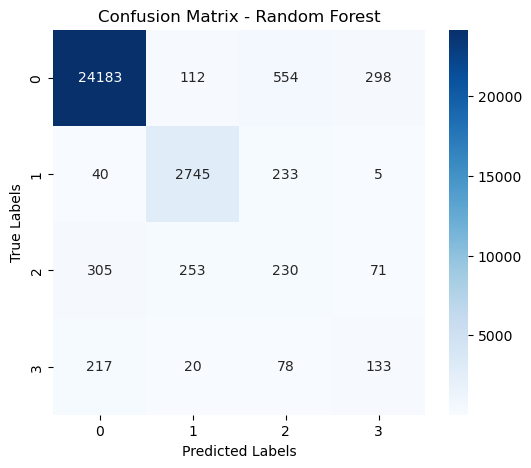

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test_preprocessed)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest - Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [27]:
import pandas as pd
import numpy as np

# Extract feature names
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort features by absolute importance
feature_importance_df["Abs_Importance"] = feature_importance_df["Importance"].abs()
feature_importance_df = feature_importance_df.sort_values(by="Abs_Importance", ascending=False)

# Add a column to classify importance by class
feature_importance_df["Class"] = np.where(
    feature_importance_df["Importance"] > 0, "High Impact", "Low Impact"
)

# Select the top features (e.g., top 10)
top_features = feature_importance_df.head(10)

# Display the top features
print("\nTop Important Features for Each Class (Random Forest):\n")
print(top_features)



Top Important Features for Each Class (Random Forest):

                                          Feature  Importance  Abs_Importance  \
104                                 num__TOT_COST    0.415584        0.415584   
105           num__DIFF_BTW_SERVICE_PROMISED_TIME    0.290303        0.290303   
106                              num__SVC_REQ_DAY    0.170954        0.170954   
1                              cat__SVC_RGN_CD_FL    0.006772        0.006772   
97   cat__VEH_MDL_YR_DT_2014-01-01 00:00:00+00:00    0.004521        0.004521   
2                              cat__SVC_RGN_CD_GA    0.004349        0.004349   
88   cat__VEH_MDL_YR_DT_2005-01-01 00:00:00+00:00    0.004282        0.004282   
98   cat__VEH_MDL_YR_DT_2015-01-01 00:00:00+00:00    0.004279        0.004279   
90   cat__VEH_MDL_YR_DT_2007-01-01 00:00:00+00:00    0.004139        0.004139   
95   cat__VEH_MDL_YR_DT_2012-01-01 00:00:00+00:00    0.004138        0.004138   

           Class  
104  High Impact  
105  High Imp


=== Classification Report - Random Forest ===

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     25147
           1       0.88      0.91      0.89      3023
           2       0.21      0.27      0.24       859
           3       0.26      0.30      0.28       448

    accuracy                           0.93     29477
   macro avg       0.58      0.61      0.59     29477
weighted avg       0.93      0.93      0.93     29477


=== Classification Report - Logistic Regression ===

              precision    recall  f1-score   support

           0       0.98      0.58      0.73     25147
           1       0.85      1.00      0.92      3023
           2       0.03      0.21      0.05       859
           3       0.03      0.37      0.06       448

    accuracy                           0.61     29477
   macro avg       0.47      0.54      0.44     29477
weighted avg       0.92      0.61      0.72     29477


=== Confusion Matrix - Rand

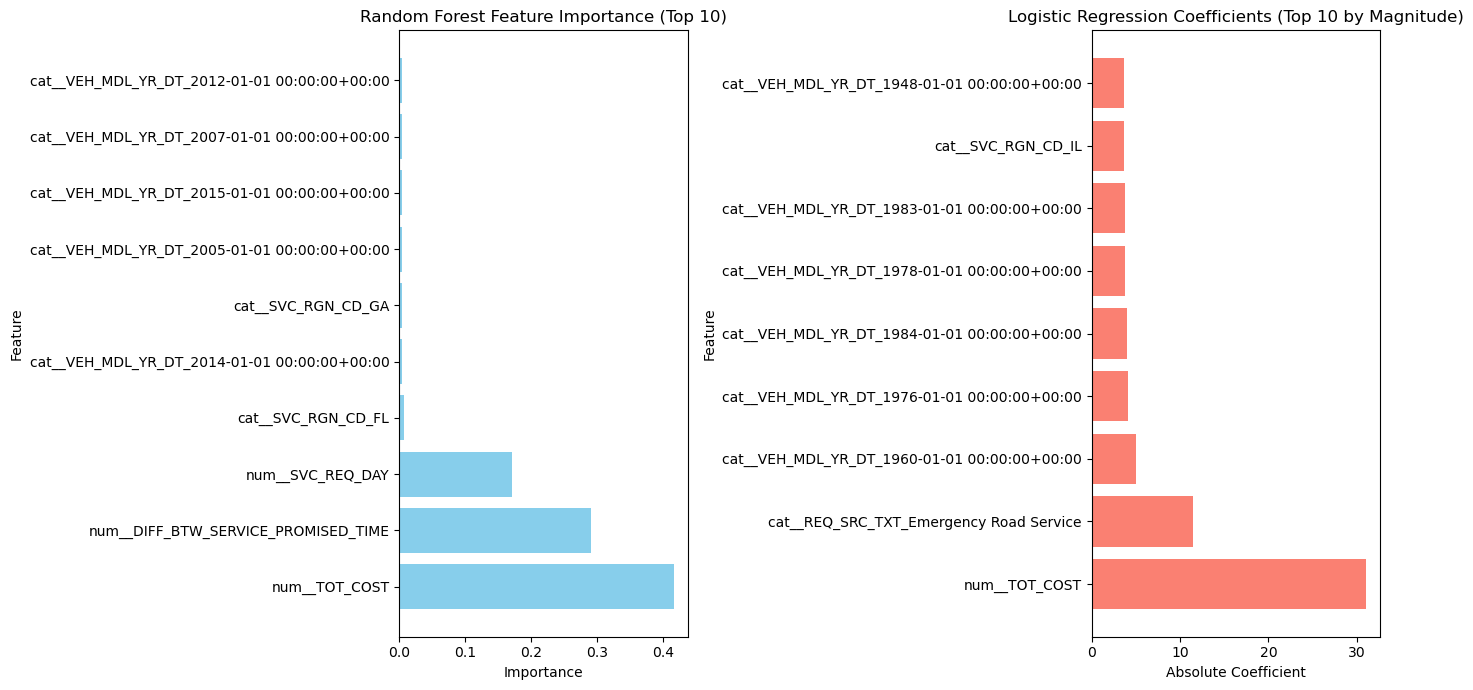

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# ------------------------------
# Model Predictions & Evaluations
# ------------------------------

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Predict using Logistic Regression
y_pred_lr = classifier.predict(X_test_preprocessed)

# ------------------------------
# Classification Reports
# ------------------------------
print("\n=== Classification Report - Random Forest ===\n")
print(classification_report(y_test, y_pred_rf))

print("\n=== Classification Report - Logistic Regression ===\n")
print(classification_report(y_test, y_pred_lr))

# ------------------------------
# Confusion Matrices
# ------------------------------
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print Confusion Matrices as Text
print("\n=== Confusion Matrix - Random Forest ===\n")
print(pd.DataFrame(conf_matrix_rf, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], 
                                      columns=["Pred 0", "Pred 1", "Pred 2", "Pred 3"]))

print("\n=== Confusion Matrix - Logistic Regression ===\n")
print(pd.DataFrame(conf_matrix_lr, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], 
                                      columns=["Pred 0", "Pred 1", "Pred 2", "Pred 3"]))

# ------------------------------
# Accuracy Comparison
# ------------------------------
rf_accuracy = accuracy_score(y_test, y_pred_rf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("\n=== Accuracy Comparison ===")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# ------------------------------
# Logistic Regression Feature Coefficients
# ------------------------------
# Get the coefficients from the trained logistic regression model for all classes
lr_feature_names = preprocessor.get_feature_names_out()
lr_coefficients = classifier.coef_

# Create a DataFrame to store and visualize the coefficients for each class
lr_coeff_df = pd.DataFrame(lr_coefficients.T, index=lr_feature_names, columns=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# ------------------------------
# Feature Importance from Logistic Regression (Generalized)
# ------------------------------
# Create a list of dictionaries for each feature and its coefficient across all classes
feature_importance_list = []
for class_idx, class_coeffs in enumerate(lr_coefficients):
    class_name = f'Class {class_idx}'
    for feature, coeff in zip(lr_feature_names, class_coeffs):
        feature_importance_list.append({
            'Feature': feature,
            'Coefficient': coeff,
            'Class': class_name
        })

# Convert to DataFrame for better readability
feature_importance_df = pd.DataFrame(feature_importance_list)

# Add an absolute value column for sorting by magnitude
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort the features by absolute coefficient values (importance)
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top important features numerically
print("\nTop Important Features for Each Class (Sorted by Magnitude):")
print(feature_importance_df[['Feature', 'Coefficient', 'Abs_Coefficient', 'Class']].head(10))

# ------------------------------
# Feature Importance from Random Forest
# ------------------------------
# Get feature importance from Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame to visualize the feature importance for Random Forest
rf_importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': rf_feature_importance
})

# Sort the features by importance in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Display the top important features numerically from Random Forest
print("\nTop Important Features from Random Forest:")
print(rf_importance_df[['Feature', 'Importance']].head(10))

# ------------------------------
# Plot Comparison: Random Forest vs Logistic Regression
# ------------------------------
# Plot Feature Importance for Random Forest (Top 10)
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
top_10_rf = rf_importance_df.head(10)  # Selecting the top 10 features from Random Forest
plt.barh(top_10_rf['Feature'], top_10_rf['Importance'], color='skyblue')
plt.title('Random Forest Feature Importance (Top 10)')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Plot the absolute coefficients for Logistic Regression (Top 10 by magnitude)
plt.subplot(1, 2, 2)
top_10_lr = feature_importance_df.head(10)  # Selecting the top 10 features by absolute coefficient value
plt.barh(top_10_lr['Feature'], top_10_lr['Abs_Coefficient'], color='salmon')
plt.title('Logistic Regression Coefficients (Top 10 by Magnitude)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()
